In [65]:
# importing required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
#extracting datas from the excel by using pandas
df=pd.read_excel(r"C:\Users\krish\OneDrive\Desktop\project\copper modeling\Copper_Set.xlsx")
df.shape

(181673, 14)

DATA JAR
1. Is there any null values     - yes (by using forwad fill and dropna we remove the null values)
2. Is there is any duplicates   - no duplicates in the dataframe
3. data is in structured format as row and coloumn
4. data is in correct format    - quantity tons is should in folat but it is object

In [67]:
# counting the null values
df.isna().sum()

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [68]:
# by using the forward fill to fill the null values in item_date and delivery date
df["item_date"]=df["item_date"].fillna(method='ffill')
df["delivery date"]=df["delivery date"].fillna(method='ffill')

C:\Users\krish\AppData\Local\Temp\ipykernel_3104\3306682432.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["item_date"]=df["item_date"].fillna(method='ffill')
C:\Users\krish\AppData\Local\Temp\ipykernel_3104\3306682432.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["delivery date"]=df["delivery date"].fillna(method='ffill')


In [69]:
# formating the item_date and the delivery date to find the no of days taken for the copper 
df['item_date'] = pd.to_datetime(df['item_date'], format='%Y%m%d',errors='coerce')
df['delivery date'] = pd.to_datetime(df['delivery date'], format='%Y%m%d',errors='coerce')


df['days_between'] = (df['delivery date'] - df['item_date']).dt.days

In [70]:
# by droping the null values in the dataframe
df.dropna(subset=["customer","country","status","application","thickness","selling_price","days_between"],inplace=True)

In [71]:
# by using the id we cannot predict and the material ref is having more null values so deleting both the coloumn
del(df["material_ref"],df["id"],df["item_date"],df["delivery date"])

In [72]:
print(df.isna().sum())
df.shape

quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
selling_price    0
days_between     0
dtype: int64


(181636, 11)

In [73]:
#droping the duplicates by this command
df.drop_duplicates()
df.shape

(181636, 11)

In [74]:
#to check the data types 
df.dtypes

quantity tons     object
customer         float64
country          float64
status            object
item type         object
application      float64
thickness        float64
width            float64
product_ref        int64
selling_price    float64
days_between     float64
dtype: object

In [75]:
#quantity tons should be in float but it was as object so we need to change by using this command
df["quantity tons"]=df["quantity tons"].replace("e",np.NaN)
df["quantity tons"].fillna(df["quantity tons"].mean(), inplace=True)
df["quantity tons"] = df["quantity tons"].astype(float)

In [76]:
df.dtypes

quantity tons    float64
customer         float64
country          float64
status            object
item type         object
application      float64
thickness        float64
width            float64
product_ref        int64
selling_price    float64
days_between     float64
dtype: object

In [77]:
df.head(2)

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price,days_between
0,54.151139,30156308.0,28.0,Won,W,10.0,2.0,1500.0,1670798778,854.0,91.0
1,768.024839,30202938.0,25.0,Won,W,41.0,0.8,1210.0,1668701718,1047.0,0.0


In [78]:
# outlier using cliping to remove the outlier for the continious values coloumn
lis=["quantity tons","application","thickness","width","selling_price","days_between"]
for column in lis:        
    iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
    upper_threshold = df[column].quantile(0.75) + (1.5*iqr)
    lower_threshold = df[column].quantile(0.25) - (1.5*iqr)
    df[column] = df[column].clip(lower_threshold, upper_threshold)

,quantity tons,selling_price
quantity tons,1.000000,-0.041868
selling_price,-0.041868,1.000000


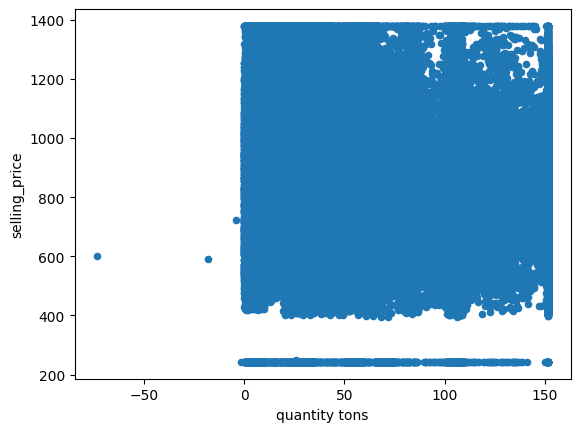

In [79]:
# by seeing this plot there is some no linear relation ship between the quantity tons and selling price so we can use to fit the model by decision tree random forest,xgboost algoritham to find the best model for the regresor
df.plot.scatter(x="quantity tons",y="selling_price")
df[["quantity tons","selling_price"]].corr()

In [80]:
# by seeing this we can seens like a id it is not an important feature to predict the selling price so we can delete the coloumn
print(len(df["customer"].unique()))
del(df["customer"])

1167


17
country
25.0      836.531122
26.0      809.070135
27.0      821.674518
28.0      827.946242
30.0      850.767676
32.0      833.491895
38.0      870.921145
39.0      767.230027
40.0      700.108140
77.0      768.388789
78.0      802.305567
79.0      758.508720
80.0      721.845966
84.0      859.060792
89.0      656.706522
107.0     847.600000
113.0    1124.245098
Name: selling_price, dtype: float64


<Axes: xlabel='country'>

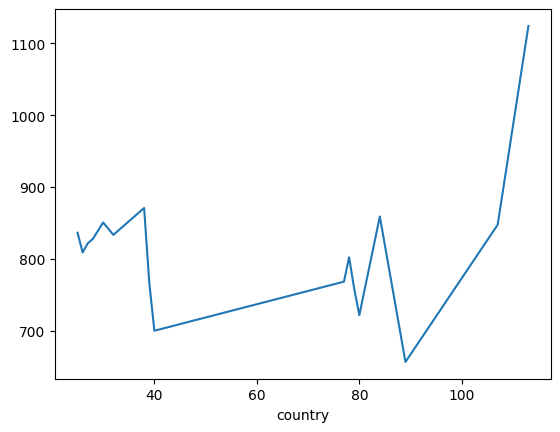

In [81]:
# by seeing this the country has the different selling selling price is is most important feature to predict the selling price 
print(len(df["country"].unique()))
print(df.groupby("country")["selling_price"].mean())
df.groupby("country")["selling_price"].mean().plot()

status
Draft               243.000000
Lost                806.016322
Not lost for AM     842.413252
Offerable           951.000000
Offered            1017.358491
Revised             854.116214
To be approved      928.537838
Won                 829.241491
Wonderful          1136.000000
Name: selling_price, dtype: float64


<Axes: xlabel='status'>

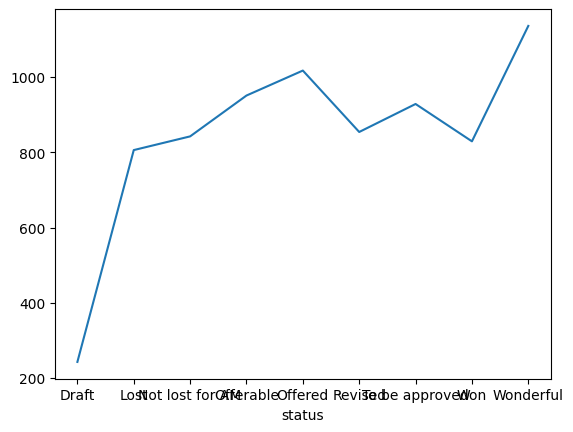

In [82]:
# by seeing this the status has the different selling selling price it is most important feature to predict the selling price 
print(df.groupby("status")["selling_price"].mean())
df.groupby("status")["selling_price"].mean().plot()

In [83]:
df["status"].unique()

array(['Won', 'Draft', 'To be approved', 'Lost', 'Not lost for AM',
       'Wonderful', 'Revised', 'Offered', 'Offerable'], dtype=object)

In [84]:
# we can do lable encoding for this status coloumn
df["status"]=df["status"].map({"Wonderful":8,"Offered":7,"Offerable":6,"To be approved":5,"Revised":4,"Not lost for AM":3,"Won":2,"Lost":1,"Draft":0})

item type
IPL        778.907407
Others     764.004197
PL         720.393267
S          804.025493
SLAWR     1195.000000
W          835.241986
WI         692.460859
Name: selling_price, dtype: float64


<Axes: xlabel='item type'>

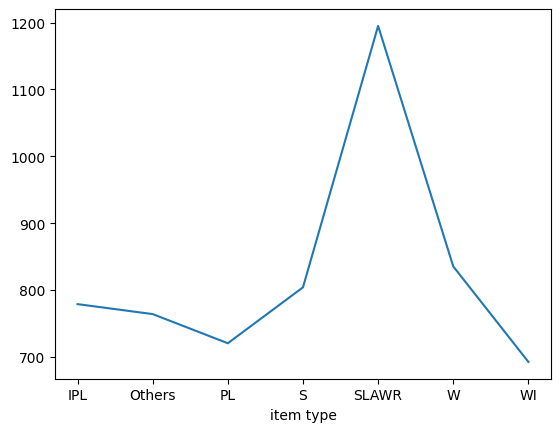

In [85]:
# by seeing this the item type has the different selling selling price it is most important feature to predict the selling price 
print(df.groupby("item type")["selling_price"].mean())
df.groupby("item type")["selling_price"].mean().plot()

In [86]:
df["item type"].unique()

array(['W', 'WI', 'S', 'Others', 'PL', 'IPL', 'SLAWR'], dtype=object)

In [87]:
# we can do lable encoding for this status coloumn
df["item type"]=df["item type"].map({"SLAWR":6,"W":5,"S":4,"IPL":3,"Others":2,"PL":1,"WI":0})

In [88]:
df.head()

,quantity tons,country,status,item type,application,thickness,width,product_ref,selling_price,days_between
0,54.151139,28.0,2,5,10.0,2.00,1500.000,1670798778,854.00,91.0
1,151.455482,25.0,2,5,41.0,0.80,1210.000,1668701718,1047.00,0.0
2,151.455482,30.0,2,0,28.0,0.38,952.000,628377,644.33,-75.5
3,151.455482,32.0,2,4,59.0,2.30,1317.000,1668701718,768.00,-75.5
4,151.455482,28.0,2,5,10.0,4.00,1980.375,640665,577.00,-31.0


In [89]:
df["application"].unique()

array([10. , 41. , 28. , 59. , 15. ,  4. , 38. , 56. , 42. , 26. , 27. ,
       19. , 20. , 66. , 29. , 22. , 40. , 25. , 67. , 79. ,  3. , 87.5,
        2. ,  5. , 39. , 69. , 70. , 65. , 58. , 68. ])

In [90]:
#application is seens like application id or no of application so it is not an important feature fro this model
del(df["application"])

thickness
0.18    1329.618056
0.19    1344.722222
0.20    1055.033333
0.21    1161.727273
0.25    1051.937500
           ...     
6.25     687.222222
6.30     655.379310
6.35     668.333333
6.40     734.000000
6.45     714.283232
Name: selling_price, Length: 443, dtype: float64


<Axes: xlabel='thickness'>

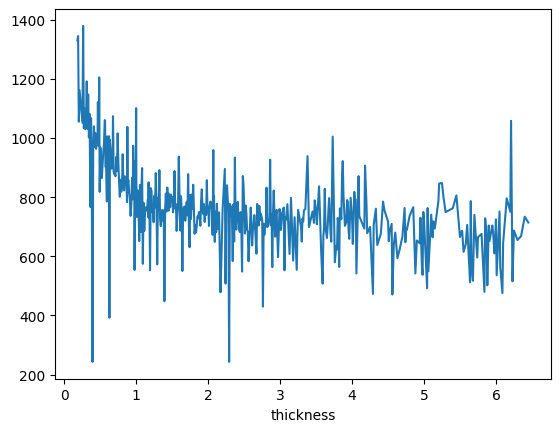

In [91]:
print(df.groupby("thickness")["selling_price"].mean())
df.groupby("thickness")["selling_price"].mean().plot()

In [92]:
# there is some linear relationship between the coloumn thickness and the silling price when the thickness increases the selling price is decreases but the ton coloumn is not in linear so we use decision tree random forest,xgboost algoritham to find the best model for the regresor
df[["thickness","selling_price"]].corr()

,thickness,selling_price
thickness,1.000000,-0.363438
selling_price,-0.363438,1.000000


width
699.375     818.458043
700.000     951.708989
705.000     776.692308
706.000     810.666667
707.000     566.420000
               ...    
1965.000    795.222222
1970.000    834.625000
1975.000    614.666667
1980.000    787.668727
1980.375    701.977328
Name: selling_price, Length: 1052, dtype: float64


<Axes: xlabel='width'>

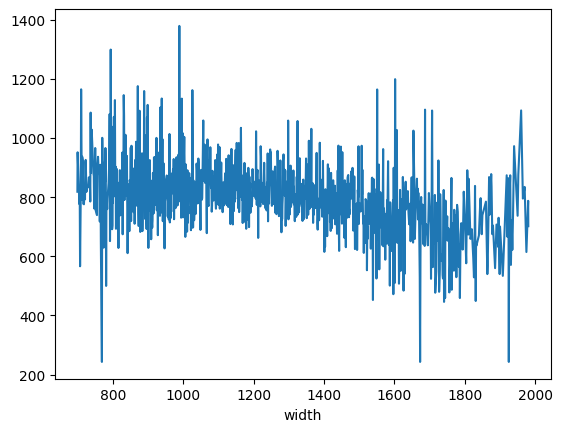

In [93]:
print(df.groupby("width")["selling_price"].mean())
df.groupby("width")["selling_price"].mean().plot()

<Axes: xlabel='width', ylabel='selling_price'>

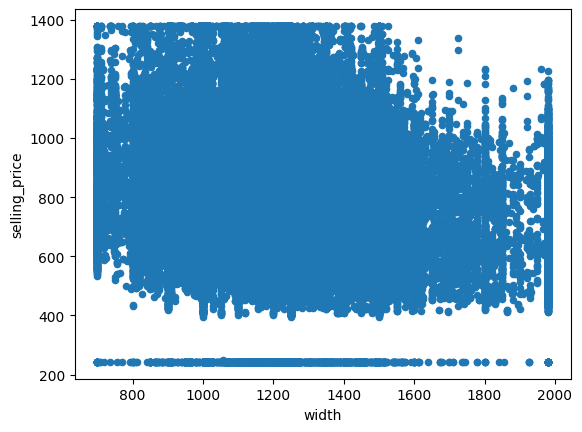

In [94]:
df.plot.scatter(x="width",y="selling_price")

In [95]:
# there is not linear relationship between the coloumn width and the silling price so we use decision tree random forest,xgboost algoritham to find the best model for the regresor
df[["width","selling_price"]].corr()

,width,selling_price
width,1.000000,-0.173076
selling_price,-0.173076,1.000000


In [96]:
# product_ref it is seens like an product unique no of 
print(len(df["product_ref"].unique()))

33


In [97]:
df[["product_ref","selling_price"]].corr()

,product_ref,selling_price
product_ref,1.000000,-0.078063
selling_price,-0.078063,1.000000


In [98]:
#no relation ship also we can delete the coloumn 
del(df["product_ref"])

In [99]:
df

,quantity tons,country,status,item type,thickness,width,selling_price,days_between
0,54.151139,28.0,2,5,2.00,1500.000,854.00,91.0
1,151.455482,25.0,2,5,0.80,1210.000,1047.00,0.0
2,151.455482,30.0,2,0,0.38,952.000,644.33,-75.5
3,151.455482,32.0,2,4,2.30,1317.000,768.00,-75.5
4,151.455482,28.0,2,5,4.00,1980.375,577.00,-31.0
...,...,...,...,...,...,...,...,...
181668,102.482422,25.0,2,5,0.96,1220.000,591.00,-1.0
181669,151.455482,25.0,2,5,0.95,1500.000,589.00,-1.0
181670,4.235594,25.0,2,5,0.71,1250.000,619.00,-1.0
181671,-73.323615,25.0,2,5,0.85,1250.000,601.00,-1.0


In [100]:
# drop negative values in days_between column
df.drop(df[df['days_between']<0].index,inplace=True)
df.drop(df[df['quantity tons']<0].index,inplace=True)
df.drop(df[df['thickness']<0].index,inplace=True)
df.drop(df[df['width']<0].index,inplace=True)

In [101]:
df["days_between"].value_counts()

days_between
76.0     3262
28.0     3229
30.0     2936
67.0     2453
52.0     2182
         ... 
166.0       5
160.0       5
165.0       5
159.0       3
172.0       1
Name: count, Length: 178, dtype: int64

In [102]:
df

,quantity tons,country,status,item type,thickness,width,selling_price,days_between
0,54.151139,28.0,2,5,2.00,1500.000,854.0,91.0
1,151.455482,25.0,2,5,0.80,1210.000,1047.0,0.0
5,151.455482,25.0,2,5,1.50,1265.000,983.0,0.0
6,3.522613,30.0,0,5,0.38,1125.000,243.0,91.0
8,69.071853,38.0,2,4,0.60,1275.000,1363.0,91.0
...,...,...,...,...,...,...,...,...
181433,32.216122,25.0,1,4,6.00,1980.375,552.0,30.0
181525,66.431473,30.0,1,4,3.85,1525.000,458.0,30.0
181527,63.859521,30.0,1,4,5.85,1525.000,457.0,30.0
181529,56.028562,30.0,1,4,6.45,1500.000,458.0,30.0


In [103]:
# spliting the datas
from sklearn.model_selection import train_test_split
x=df.loc[: ,list(df.columns)[:-2]+["days_between"]]
y=df.loc[ : ,["selling_price"]]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=7)

In [104]:
df.shape

(165527, 8)

In [105]:
x_train.shape,y_train.shape

((124145, 7), (124145, 1))

In [107]:
# by using the decisiontree regressor we find the best depth for the model 
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
for i in range (1,25):
    model=DecisionTreeRegressor(max_depth=i,random_state=333)
    model.fit(x_train,y_train)
    cross_va=np.mean(cross_val_score(model,x_train,y_train,cv=10))
    print(f"the r2 score of the decisiontreethe depth is {i},score{model.score(x_test,y_test)},cross validation score {cross_va}")

the r2 score of the decisiontreethe depth is 1,score0.17524003023529822,cross validation score 0.1784983150602953
the r2 score of the decisiontreethe depth is 2,score0.3584352911315045,cross validation score 0.35416526502884
the r2 score of the decisiontreethe depth is 3,score0.4422941498811469,cross validation score 0.43941139767307497
the r2 score of the decisiontreethe depth is 4,score0.47560087491913927,cross validation score 0.47531157568213656
the r2 score of the decisiontreethe depth is 5,score0.4953633174500772,cross validation score 0.49697230441009
the r2 score of the decisiontreethe depth is 6,score0.5153479023030224,cross validation score 0.5142712697651567
the r2 score of the decisiontreethe depth is 7,score0.5327603082583288,cross validation score 0.5350174220852382
the r2 score of the decisiontreethe depth is 8,score0.5630498405932692,cross validation score 0.563673051541705
the r2 score of the decisiontreethe depth is 9,score0.5893207128894493,cross validation score 0.5

In [108]:
# the hyperparameter for this model depth is 18 by crossvalidation score so we built the model by depth 14
model=DecisionTreeRegressor(max_depth=18,random_state=333)
model.fit(x_train,y_train)
model.score(x_test,y_test)


0.7252260202287205

In [109]:
# by using the sqlite to save the cleaned and encoded finall data to feature use
#import sqlite3

# Connect to the SQLite database
#mydb = sqlite3.connect('coppermodel.db')
#mycursor = mydb.cursor()

# Drop the table if it exists
#query = '''DROP TABLE IF EXISTS copper'''
#mycursor.execute(query)

# Commit the transaction (not strictly necessary for dropping a table, but good practice)
#mydb.commit()

# Close the cursor and connection
#mycursor.close()
#mydb.close()


In [111]:
#import sqlite3

# Connect to the SQLite database
#mydb = sqlite3.connect('coppermodel.db')
#mycursor = mydb.cursor()
#for i,j in df.iterrows():
#    querry="""create table if not exists copper (quantity_tons float,country float,status int,item_type int ,thickness float,width float,selling_price float,days_between float)"""
#    mycursor.execute(querry)
#    in_querry="""insert into copper (quantity_tons,country,status,item_type,thickness,width,selling_price,days_between) values (?,?,?,?,?,?,?,?)"""
#    values=(j["quantity tons"],j["country"],j["status"],j["item type"],j["thickness"],j["width"],j["selling_price"],j["days_between"])
#    mycursor.execute(in_querry,values)
#    mydb.commit()


In [112]:
import sqlite3
import pandas as pd

conn = sqlite3.connect('coppermodel.db', timeout=10)  # 10 seconds timeout

df=pd.read_sql_query('select * from  copper',conn)

In [113]:
df

,quantity_tons,country,status,item_type,thickness,width,selling_price,days_between
0,54.151139,28.0,2,5,2.00,1500.000,854.0,91.0
1,54.151139,28.0,2,5,2.00,1500.000,854.0,91.0
2,151.455482,25.0,2,5,0.80,1210.000,1047.0,0.0
3,151.455482,25.0,2,5,1.50,1265.000,983.0,0.0
4,3.522613,30.0,0,5,0.38,1125.000,243.0,91.0
...,...,...,...,...,...,...,...,...
165523,32.216122,25.0,1,4,6.00,1980.375,552.0,30.0
165524,66.431473,30.0,1,4,3.85,1525.000,458.0,30.0
165525,63.859521,30.0,1,4,5.85,1525.000,457.0,30.0
165526,56.028562,30.0,1,4,6.45,1500.000,458.0,30.0


also we checking the random forest model to check the r2 score to find which model is best 

In [114]:
#from sklearn.ensemble import RandomForestRegressor
#import numpy as np
#from sklearn.model_selection import cross_val_score

# Assuming x_train and y_train are already defined

#for n in [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]:
#    model = RandomForestRegressor(n_estimators=n, max_depth=3, max_features='sqrt', random_state=42)
#    cross_val_scores = np.mean(cross_val_score(model, x_train, y_train, cv=10))
#    print(f"n_estimators={n}, crossvalidation score{cross_val_scores}")


c:\Users\krish\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\krish\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\krish\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\krish\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConvers

n_estimators=10, crossvalidation score0.3583757359770273


c:\Users\krish\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\krish\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\krish\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\krish\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConvers

n_estimators=20, crossvalidation score0.37464538741039166


c:\Users\krish\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\krish\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\krish\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\krish\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConvers

n_estimators=30, crossvalidation score0.39525216379346356


c:\Users\krish\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\krish\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\krish\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\krish\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConvers

n_estimators=40, crossvalidation score0.39418173765018105


c:\Users\krish\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\krish\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\krish\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\krish\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConvers

n_estimators=50, crossvalidation score0.3920198876135862


c:\Users\krish\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\krish\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\krish\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\krish\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConvers

n_estimators=60, crossvalidation score0.3949802982736306


c:\Users\krish\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\krish\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\krish\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\krish\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConvers

n_estimators=70, crossvalidation score0.3900530959964974


c:\Users\krish\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\krish\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\krish\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\krish\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConvers

n_estimators=80, crossvalidation score0.39306116233237776


c:\Users\krish\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\krish\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\krish\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\krish\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConvers

n_estimators=90, crossvalidation score0.3968636269498924


c:\Users\krish\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\krish\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\krish\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\krish\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConvers

n_estimators=100, crossvalidation score0.39600562972694286


In [115]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.model_selection import cross_val_score

model=RandomForestRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)

c:\Users\krish\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.8316075084550681

also we checking the xgboost model to check the r2 score to find which model is best 

In [65]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

# Assuming x_train, y_train are already defined

for lam in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]:
    model = XGBRegressor(reg_lambda=lam, objective='reg:squarederror')
    cross_val_scores = np.mean(cross_val_score(model, x_train, y_train, cv=10))
    print(f"lambda={lam}, crossvalidation score={cross_val_scores}")


lambda=0.1, crossvalidation score=0.7347387625164757
lambda=0.2, crossvalidation score=0.7341861368749768
lambda=0.3, crossvalidation score=0.7331523544357536
lambda=0.4, crossvalidation score=0.7346349442142254
lambda=0.5, crossvalidation score=0.7338966223303122
lambda=0.6, crossvalidation score=0.7324569756008159
lambda=0.7, crossvalidation score=0.7358449140323934
lambda=0.8, crossvalidation score=0.7341590939752628
lambda=0.9, crossvalidation score=0.734828982010735
lambda=1, crossvalidation score=0.7340177579752024


In [69]:
model=XGBRegressor(learning_rate=0.7)
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.7586466791767441

finaly the best model for the copper model price prediction is xgbooster the learning rate is 0.7